<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Goal: Slices through `bhp_e`

I learned that we can't go from `bhp` in time space to energy space because of the nonuniform binning, so I built a method to generate `bhm_e` on an event by event bases (`methods > build_bhm_with_energy.ipynb`), then plot as `bhp_e` (`methods > build_plot_bhp_e.ipynb`), and now I'm going to do some slices. 

P. Schuster  
University of Michigan  
June 28 2018  

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import os
import scipy.io as sio
import sys
import time
import inspect
import pandas as pd
from tqdm import *

# Plot entire array
np.set_printoptions(threshold=np.nan)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append('../scripts/')
import bicorr as bicorr
import bicorr_plot as bicorr_plot
import bicorr_e as bicorr_e
import bicorr_math as bicorr_math

Steps in the process:

* Load the data for `bhm_e`
* Produce `bhp_e`
* Choose energies at which to take slices
* Calculate slices, view them on `bhp_e` plot
* Calculate energy averages

# Load the data for `bhm_e`

Same data as `methods > build_plot_bhp_e.ipynb`.

In [4]:
bhm_e, e_bin_edges, note = bicorr_e.load_bhm_e('../analysis/Cf072115_to_Cf072215b/datap')

In [5]:
print(bhm_e.shape)
print(e_bin_edges.shape)
print(note)

(990, 1, 600, 600)
(601,)
Combined measurements from Cf072115 Cf072115b Cf072215a Cf072215b


In [6]:
det_df = bicorr.load_det_df()

In [7]:
dict_pair_to_index, dict_index_to_pair, dict_pair_to_angle = bicorr.build_dict_det_pair(det_df)

In [8]:
num_fissions = 2194651200.00

# Produce `bhp_e`

In [11]:
num_fissions = 2194651200.00
bhp_e, norm_factor = bicorr_e.build_bhp_e(bhm_e,e_bin_edges,num_fissions=num_fissions,print_flag=True)

Creating bhp_e for...
pair_is =  all
energy bin width (MeV) =  0.025
length of pair_is =  990
norm_factor =  1357940430.0000002


C:\Users\pfschus\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


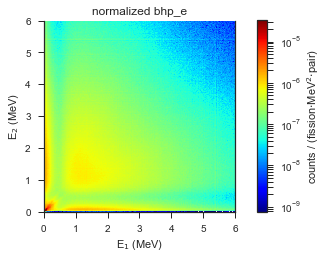

<Figure size 576x396 with 0 Axes>

In [12]:
bicorr_plot.bhp_e_plot(bhp_e, e_bin_edges, zoom_range=[0,6], title = "normalized bhp_e", show_flag = True)

# Slices analysis

## Choose energies at which to take slices

In [13]:
e_slices = list(np.arange(0.5,6,.5))
print(e_slices)

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]


C:\Users\pfschus\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


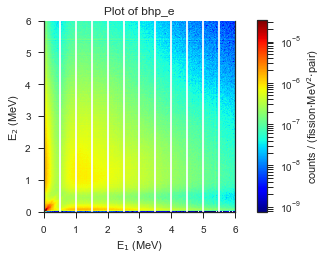

In [14]:
bicorr_plot.bhp_e_plot(bhp_e, e_bin_edges, zoom_range=[0,6], title='Plot of bhp_e', show_flag=False, clear_flag=False)

for e in e_slices:    
    plt.axvline(e,c='w') 
    
plt.show()

## Calculate slices

In [15]:
bhp_e_slice, slice_e_range = bicorr_e.slice_bhp_e(bhp_e, e_bin_edges, 2, 2.45, True)

Creating slice through bhp_e for energies from 2.0 to 2.475


In [16]:
bhp_e_slices,slice_e_ranges = bicorr_e.slices_bhp_e(bhp_e,e_bin_edges,e_slices,0.224)

In [17]:
len(e_bin_edges)

601

In [18]:
bhp_e_slices.shape

(11, 600)

In [19]:
slice_e_ranges

array([[0.5  , 0.725],
       [1.   , 1.225],
       [1.5  , 1.725],
       [2.   , 2.225],
       [2.5  , 2.725],
       [3.   , 3.225],
       [3.5  , 3.725],
       [4.   , 4.225],
       [4.5  , 4.725],
       [5.   , 5.225],
       [5.5  , 5.725]])

## Plot the slices

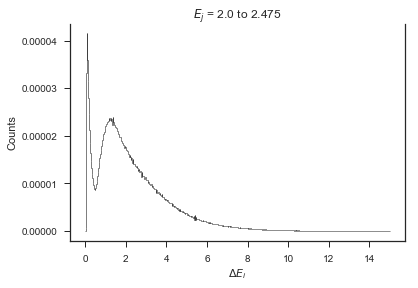

<Figure size 576x396 with 0 Axes>

In [20]:
bicorr_plot.plot_bhp_e_slice(bhp_e_slice,e_bin_edges,slice_e_range,
                             show_flag=True)

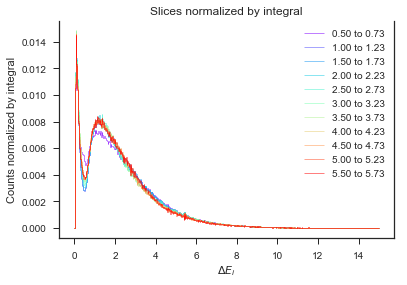

['0.50 to 0.73',
 '1.00 to 1.23',
 '1.50 to 1.73',
 '2.00 to 2.23',
 '2.50 to 2.73',
 '3.00 to 3.23',
 '3.50 to 3.73',
 '4.00 to 4.23',
 '4.50 to 4.73',
 '5.00 to 5.23',
 '5.50 to 5.73']

In [21]:
bicorr_plot.plot_bhp_e_slices(bhp_e_slices,e_bin_edges,slice_e_ranges)

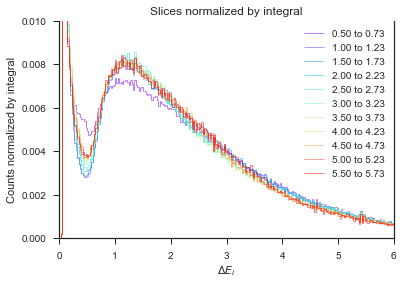

In [22]:
bicorr_plot.plot_bhp_e_slices(bhp_e_slices,e_bin_edges,slice_e_ranges,
                              show_flag = False)
plt.xlim([0,6])
plt.ylim([0,0.01])
plt.show()

## Calculate energy averages

Need to work in absolute counts, not normalized counts. 

In [23]:
bhp_e, norm_factor = bicorr_e.build_bhp_e(bhm_e,e_bin_edges,print_flag=True)

Creating bhp_e for...
pair_is =  all
energy bin width (MeV) =  0.025
length of pair_is =  990
norm_factor =  1


In [24]:
bhp_e_slices,slice_e_ranges = bicorr_e.slices_bhp_e(bhp_e,e_bin_edges,e_slices,0.224)
print(slice_e_ranges)

[[0.5   0.725]
 [1.    1.225]
 [1.5   1.725]
 [2.    2.225]
 [2.5   2.725]
 [3.    3.225]
 [3.5   3.725]
 [4.    4.225]
 [4.5   4.725]
 [5.    5.225]
 [5.5   5.725]]


In [25]:
E_min = 0.75; E_max = 4;

Eave, Eave_err, Ej = bicorr_e.calc_Eave_slices(bhp_e_slices,e_slices,e_bin_edges,E_min,E_max)

Plot it.

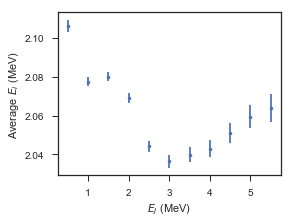

In [36]:
bicorr_plot.plot_Eave_vs_Ej(Eave, Eave_err, Ej)

Over what range was this taken?

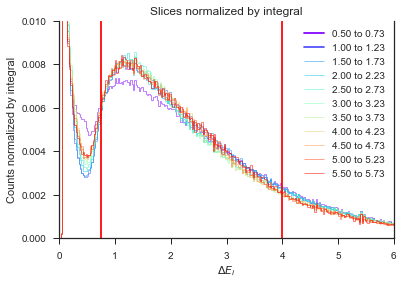

In [37]:
bicorr_plot.plot_bhp_e_slices(bhp_e_slices,e_bin_edges,slice_e_ranges,
                              E_min = E_min, E_max = E_max,
                              show_flag = False)
plt.xlim([0,6])
plt.ylim([0,0.01])
plt.show()

# In 10-degree bins

In [9]:
# Set up data

In [10]:
angle_bin_edges = np.arange(8,190,10)
angle_bin_centers = bicorr_math.calc_centers(angle_bin_edges)
angle_indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17]

In [11]:
e_slices = list(np.arange(0.5,6,.5))
E_min = 0.75; E_max = 4;

In [12]:
# Allocate arrays

In [13]:
bhp_e = np.zeros((len(angle_bin_centers),len(e_bin_edges)-1,len(e_bin_edges)-1))
norm_factor = np.zeros(len(angle_bin_centers))

bhp_e_slices = np.zeros((len(angle_bin_centers),len(e_slices),len(e_bin_edges)-1))

Eave = np.zeros((len(angle_bin_centers),len(e_slices)))
Eave_err = np.zeros((len(angle_bin_centers),len(e_slices)))

In [30]:
# Do the calculations
for i in angle_indices: #range(len(angle_bin_centers)):
    angle_min = angle_bin_edges[i]
    angle_max = angle_bin_edges[i+1]
    
    pair_is = bicorr.generate_pair_is(det_df, angle_min, angle_max)
    bhp_e[i,:,:], norm_factor[i] = bicorr_e.build_bhp_e(bhm_e,e_bin_edges,pair_is=pair_is,num_fissions = num_fissions,print_flag=True)
    bhp_e_slices[i,:,:],slice_e_ranges = bicorr_e.slices_bhp_e(bhp_e[i,:,:],e_bin_edges,e_slices,0.224)
    Eave[i,:], Eave_err[i,:], _ = bicorr_e.calc_Eave_slices(bhp_e_slices[i,:,:],e_slices,e_bin_edges,E_min,E_max,norm_factor=norm_factor[i])

Creating bhp_e for...
pair_is =  [  0   8  44  87 129 170 210 249 287 332 360 368 395 429 462 494 525 555
 584 620 639 665 690 714 737 759 780 800 837 845 854 870 885 899 912 924
 935 953 954 962 969 975 980 984 987 989]
energy bin width (MeV) =  0.025
length of pair_is =  46
norm_factor =  63096222.000000015
Creating bhp_e for...
pair_is =  [  9  51  52 295 296 331 369 402 403 592 593 619 846 861 862 943 944 952]
energy bin width (MeV) =  0.025
length of pair_is =  18
norm_factor =  24689826.000000004
Creating bhp_e for...
pair_is =  [  1  10  17  45  53  88  93  94  95  96 130 136 137 138 171 177 178 179
 211 217 218 219 250 256 257 258 259 294 330 341 361 370 396 404 430 435
 436 437 438 463 469 470 471 495 501 502 503 526 532 533 534 556 562 563
 564 565 591 618 640 656 666 691 715 738 760 781 836 838 847 855 863 871
 876 877 878 879 886 892 893 894 900 906 907 908 913 919 920 921 925 931
 932 933 934 942 951 955 963 970 976 981 985 988]
energy bin width (MeV) =  0.025
length of pa

In [31]:
vmin = np.min(bhp_e[np.nonzero(bhp_e)])
vmax = np.max(bhp_e)

In [32]:
Eave_min = np.min(Eave[np.nonzero(Eave)])
Eave_max = np.max(Eave)

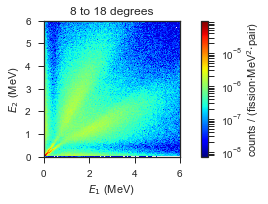

<Figure size 576x396 with 0 Axes>

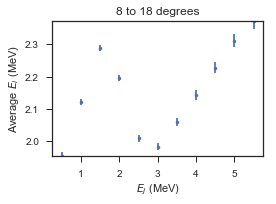

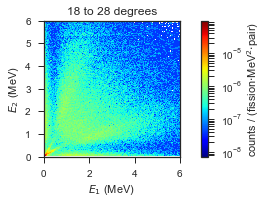

<Figure size 576x396 with 0 Axes>

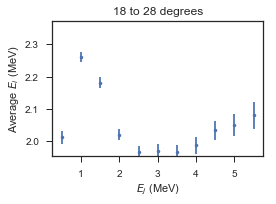

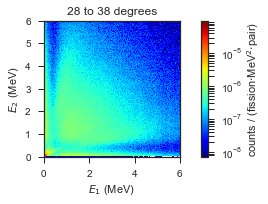

<Figure size 576x396 with 0 Axes>

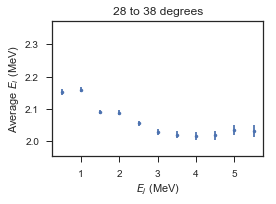

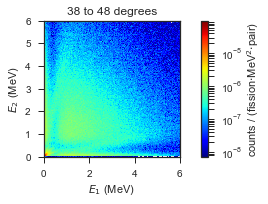

<Figure size 576x396 with 0 Axes>

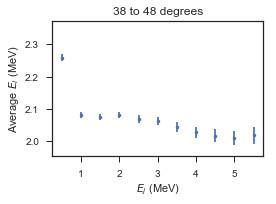

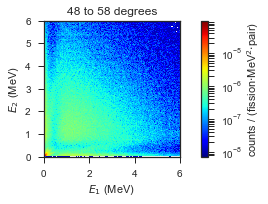

<Figure size 576x396 with 0 Axes>

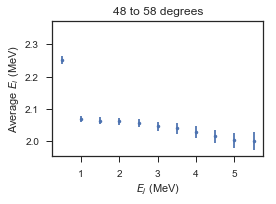

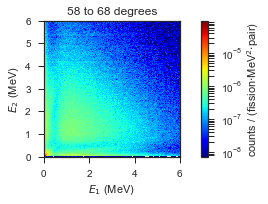

<Figure size 576x396 with 0 Axes>

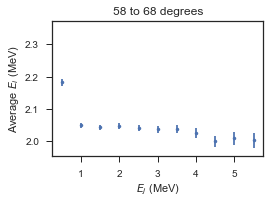

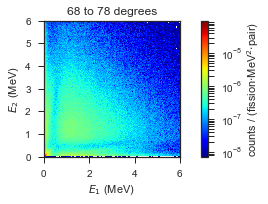

<Figure size 576x396 with 0 Axes>

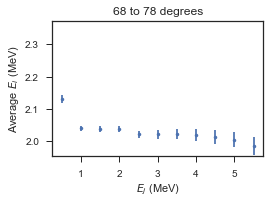

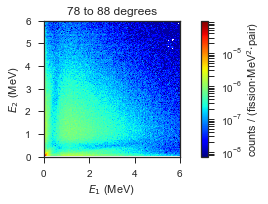

<Figure size 576x396 with 0 Axes>

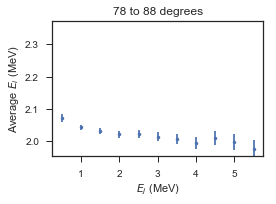

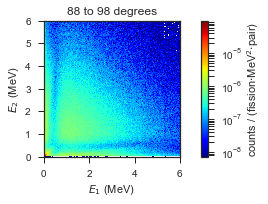

<Figure size 576x396 with 0 Axes>

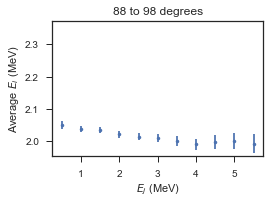

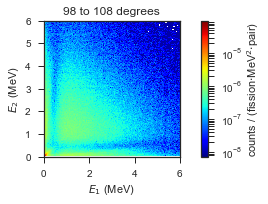

<Figure size 576x396 with 0 Axes>

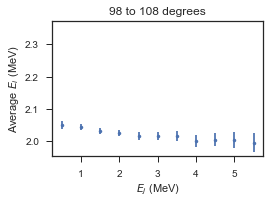

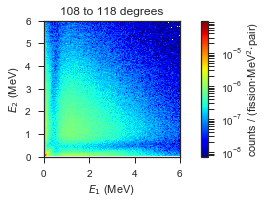

<Figure size 576x396 with 0 Axes>

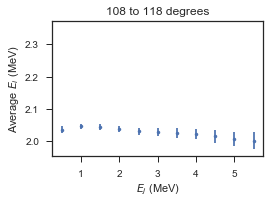

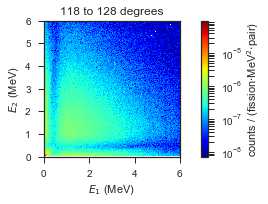

<Figure size 576x396 with 0 Axes>

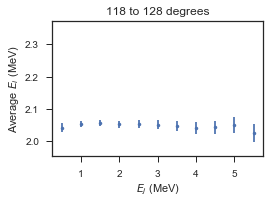

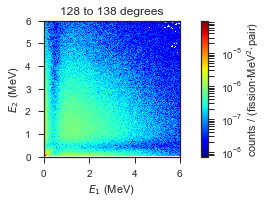

<Figure size 576x396 with 0 Axes>

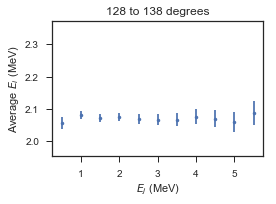

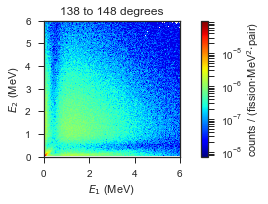

<Figure size 576x396 with 0 Axes>

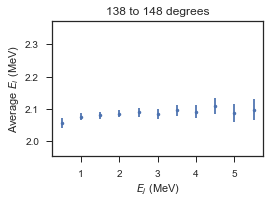

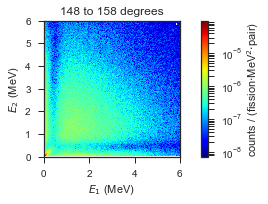

<Figure size 576x396 with 0 Axes>

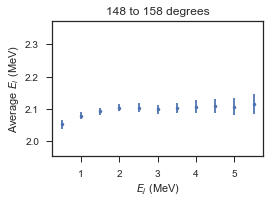

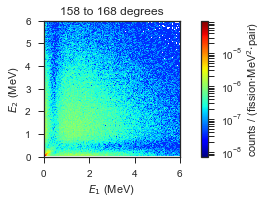

<Figure size 576x396 with 0 Axes>

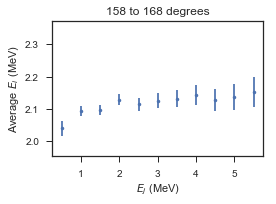

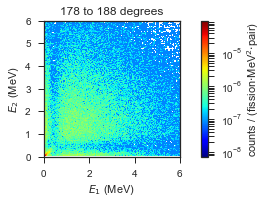

<Figure size 576x396 with 0 Axes>

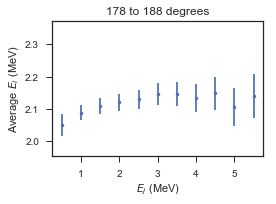

In [36]:
# Make the plots
filenames_bhp_e = []
filenames_Eave  = []  
for i in angle_indices: #range(len(angle_bin_centers)):
    angle_min = angle_bin_edges[i]
    angle_max = angle_bin_edges[i+1]   
    
    title = '{} to {} degrees'.format(angle_min, angle_max)  
    filename_bhp_e = 'bhp_e_{}_{}_deg'.format(angle_min,angle_max); filenames_bhp_e.append(filename_bhp_e);
    bicorr_plot.bhp_e_plot(bhp_e[i,:,:], e_bin_edges, zoom_range = [0,6], 
                           vmin=vmin, vmax=vmax,
                           title=title, show_flag = True,
                           save_flag = True, save_filename = filename_bhp_e)        
    #bicorr_plot.plot_bhp_e_slices(bhp_e_slices[i,:,:],e_bin_edges,slice_e_ranges,
    #                               E_min = E_min, E_max = E_max, title=title,
    #                               save_filename = 'bhp_e_slices_{}_{}_degrees'.format(angle_min,angle_max))
    filename_Eave = 'Eave_{}_{}_degrees'.format(angle_min,angle_max); filenames_Eave.append(filename_Eave);
    bicorr_plot.plot_Eave_vs_Ej(Eave[i,:], Eave_err[i,:], e_slices, title=title,
                                y_range = [Eave_min,Eave_max],
                                save_flag = True, save_filename = filename_Eave)

Save data to file

In [38]:
 np.savez('datap/slices_analysis', 
          angle_bin_edges = angle_bin_edges,
          angle_bin_centers = angle_bin_centers,
          angle_indices = angle_indices,
          e_slices = e_slices,
          E_min = E_min, E_max = E_max,
          bhp_e = bhp_e, norm_factor=norm_factor,
          bhp_e_slices = bhp_e_slices,
          Eave=Eave, Eave_err = Eave_err
          )

# Animate it all

In [39]:
import imageio

In [42]:
images_bhp_e = []
for filename in filenames_bhp_e:
    images_bhp_e.append(imageio.imread(os.path.join('fig',filename + '.png')))
imageio.mimsave('fig/animate_bhp_e.gif',images_bhp_e, fps=1)

In [45]:
images_Eave = []
for filename in filenames_Eave:
    images_Eave.append(imageio.imread(os.path.join('fig',filename + '.png')))
imageio.mimsave('fig/animate_Eave.gif',images_Eave, fps=1)